In [562]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.signal import butter, lfilter, freqz, filtfilt, find_peaks
from time_in_rois_functions import get_roi_at_each_frame, get_timeinrois_stats
from math import atan2, degrees

%matplotlib widget
os.chdir("C:/Users/eseos/OneDrive/Documents/Fleischmann Lab Research 2022/DLC Analysis/EU010/Day 9")

In [563]:
#Initialize parameters about the data you're analyzing
bp_file = "C:/Users/eseos/OneDrive/Documents/Fleischmann Lab Research 2022/DLC Analysis/EU010/Day 9/eu010_day9leftonly_2022-12-12_11.42DLC_resnet50_Big ExperimentDec20shuffle1_250000.csv"
skeleton_file = 'C:/Users/eseos/OneDrive/Documents/Fleischmann Lab Research 2022/DLC Analysis/EU010/Day 9/eu010_day9leftonly_2022-12-12_11.42DLC_resnet50_Big ExperimentDec20shuffle1_250000_skeleton.csv'
save_path = 'C:/Users/eseos/OneDrive/Documents/Fleischmann Lab Research 2022/DLC Analysis/EU010/Day 9'
bp = 'back'
fps = 25

In [564]:
bp_df = pd.read_csv(bp_file, header=[0, 1, 2])
network = bp_df.columns[1][0]
bp_df

scorer DLC_resnet50_Big ExperimentDec20shuffle1_250000              \
      bodyparts                                            nose               
         coords                                               x           y   
0             0                                      306.305176   81.519005   
1             1                                      397.724640  384.214874   
2             2                                      397.761810  384.237457   
3             3                                      397.761536  384.217010   
4             4                                      397.890045  384.133118   
...         ...                                             ...         ...   
72043     72043                                      254.200607  393.548492   
72044     72044                                      254.212967  393.565887   
72045     72045                                      254.213684  393.571655   
72046     72046                                      254.225189  393.558380   
72047     72047                                      254.192932  393.591492   

                                                                             \
                     leftear                           rightear               
      likelihood           x           y likelihood           x           y   
0       0.260454  318.728302   83.377777   0.998556  321.626495   71.551033   
1       0.132364  320.594727   81.714325   0.911242  401.590363  387.739197   
2       0.134315  396.265656  388.038849   0.902002  401.599304  387.708893   
3       0.157618  396.356232  388.022461   0.920499  401.659698  387.625122   
4       0.162075  319.449951   79.278839   0.923514  401.697937  387.560913   
...          ...         ...         ...        ...         ...         ...   
72043   0.238512  301.478638   64.924980   0.966871  305.456512   68.893173   
72044   0.239755  301.463959   64.961029   0.966243  305.490173   68.907257   
72045   0.243172  301.466034   64.942726   0.967162  305.499908   68.882980   
72046   0.246582  301.468750   64.957504   0.966755  305.491699   68.885391   
72047   0.243273  301.464050   64.974075   0.966507  305.537231   68.883514   

                  ...                                               \
                  ...       back        butt                         
      likelihood  ... likelihood           x          y likelihood   
0       0.970173  ...   0.999851  314.117584  81.586082   0.546736   
1       0.885324  ...   0.999936  311.969330  80.394783   0.996951   
2       0.888627  ...   0.999923  311.655060  75.414650   0.998589   
3       0.899210  ...   0.999947  311.182129  74.134064   0.998131   
4       0.900614  ...   0.999947  311.406128  73.659958   0.987228   
...          ...  ...        ...         ...        ...        ...   
72043   0.992164  ...   0.999872  271.270691  85.998367   0.999992   
72044   0.992233  ...   0.999869  271.273987  85.986473   0.999992   
72045   0.992111  ...   0.999872  271.274323  85.991936   0.999992   
72046   0.991983  ...   0.999872  271.274109  85.988220   0.999992   
72047   0.992042  ...   0.999871  271.278656  85.982506   0.999992   

                                                                             
          tailtip                            midtail                         
                x           y likelihood           x           y likelihood  
0      281.262115  109.344025   0.947658  290.374054   89.854103   0.997271  
1      276.614746  102.365120   0.999701  290.018616   88.231270   0.999878  
2      275.888733   98.891357   0.999988  288.350403   83.534966   0.999882  
3      271.494629   87.626823   0.999801  287.402222   76.259636   0.999299  
4      271.190338   85.739296   0.998113  283.071655   73.394951   0.998991  
...           ...         ...        ...         ...         ...        ...  
72043  285.365723  128.501114   0.999906  270.590088  108.047188   0.999786  
72044  285.378906  128.495667   0.

In [565]:
#Filter DLC coordinates so only frames with a cooridate with likihood >= .75 are included
filtered = bp_df.loc[bp_df[network][bp]["likelihood"] >= .9]

filt_bp_x = filtered[network][bp]["x"]
filt_bp_y = filtered[network][bp]["y"]

bp_x = bp_df[network][bp]["x"]
bp_y = bp_df[network][bp]["y"]
frames = bp_df["scorer"]["bodyparts"]["coords"]

In [566]:
#Plotting the Likelihood of the Back Being at a Position on Each Frame
%matplotlib widget
plt.plot(frames,bp_df[network][bp]['likelihood'])
plt.xlabel('Frame')
plt.ylabel('Likelihood')
plt.title('Likelihood of Back During Entire Video')

Text(0.5, 1.0, 'Likelihood of Back During Entire Video')

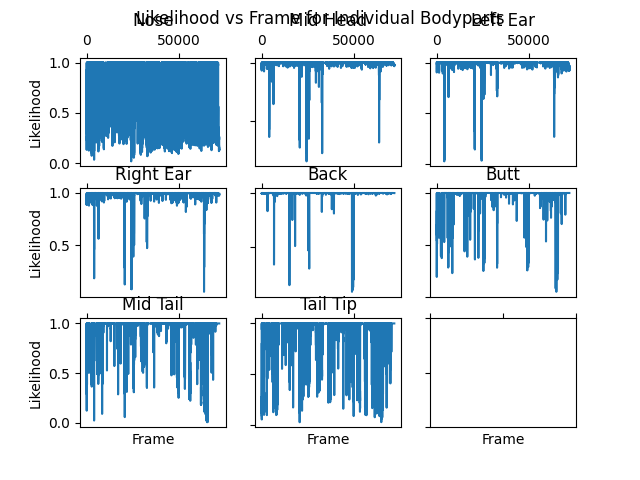

In [567]:
#Likelihood for Each Body Part on a Frame of the Video
fig, axs = plt.subplots(3, 3)

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig.suptitle('Likelihood vs Frame for Individual Bodyparts')
axs[0,0].plot(frames, bp_df[network]['nose']['likelihood'])
axs[0,1].plot(frames, bp_df[network]['midhead']['likelihood'])
axs[0,2].plot(frames, bp_df[network]['leftear']['likelihood'])
axs[1,0].plot(frames, bp_df[network]['rightear']['likelihood'])
axs[1,1].plot(frames, bp_df[network]['back']['likelihood'])
axs[1,2].plot(frames, bp_df[network]['butt']['likelihood'])
axs[2,0].plot(frames, bp_df[network]['midtail']['likelihood'])
axs[2,1].plot(frames, bp_df[network]['tailtip']['likelihood'])

axs[0,0].set_title('Nose')
axs[0,1].set_title('Mid Head')
axs[0,2].set_title('Left Ear')
axs[1,0].set_title('Right Ear')
axs[1,1].set_title('Back')
axs[1,2].set_title('Butt')
axs[2,0].set_title('Mid Tail')
axs[2,1].set_title('Tail Tip')

for ax in axs.flat:
    ax.set(xlabel='Frame', ylabel='Likelihood')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

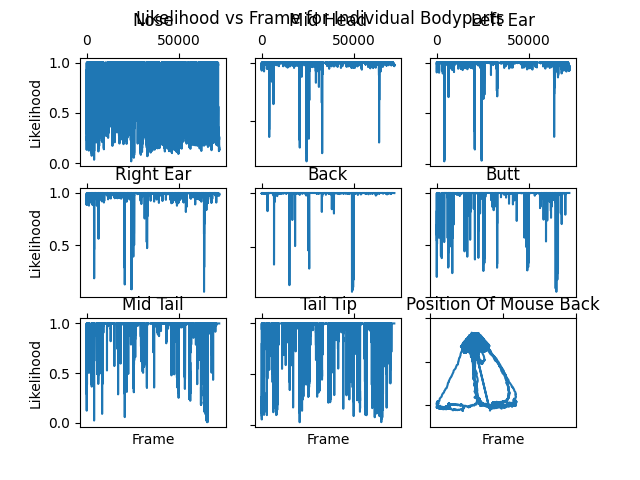

In [568]:
tracking_df = pd.DataFrame({'frame':frames,'x':bp_x,'y':bp_y})

%matplotlib widget
#Plot X,Y coordinates of back in each frame

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True


plt.plot(filt_bp_x,filt_bp_y)
plt.ylim(500,0)
plt.xlim(0,1000)
plt.title('Position Of Mouse Back')
plt.show()

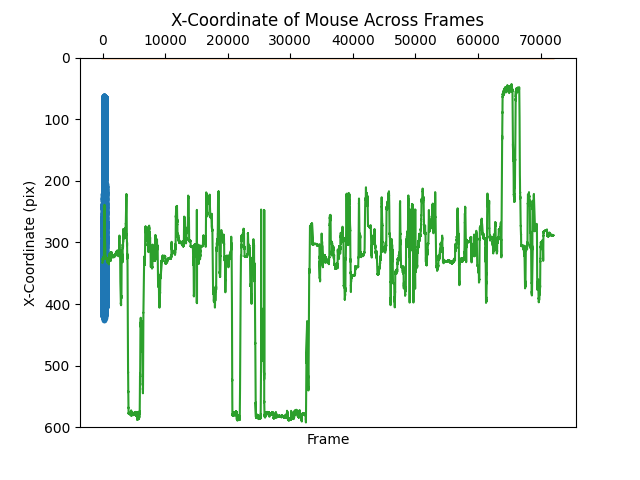

In [569]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

plt.close()
plt.title('X-Coordinate of Mouse Across Frames')
plt.plot(tracking_df['frame'],tracking_df['x'])
plt.xlabel('Frame')
plt.ylabel('X-Coordinate (pix)')
plt.show()

In [570]:
#Create a column that converts frames into seconds
tracking_df["time"] = tracking_df['frame']/fps
tracking_df

frame           x          y     time
0          0  333.264191  76.569748     0.00
1          1  333.275696  76.188469     0.04
2          2  332.541931  75.748421     0.08
3          3  332.825653  75.140373     0.12
4          4  332.890839  75.222832     0.16
...      ...         ...        ...      ...
72043  72043  288.611481  71.300606  2881.72
72044  72044  288.612091  71.279343  2881.76
72045  72045  288.611420  71.292732  2881.80
72046  72046  288.618439  71.300735  2881.84
72047  72047  288.609131  71.283600  2881.88

[72048 rows x 4 columns]

In [571]:
#Functions for Useful Measures
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def get_distance(data,window,filt=True):
    #Input should be a DataFrame with columns named 'x' and 'y' containing x,y coordinates for one bodypart 
    dists = []
    dists.append(0)
    for i in range(1,len(data)):
        x1 = data.iloc[i-1]['x']
        x2 = data.iloc[i]['x']
        y1 = data.iloc[i-1]['y']
        y2 = data.iloc[i]['y']
        dists.append(np.sqrt((x2-x1)**2 + (y2-y1)**2))
    if filt:
        dists = movingaverage(dists,window_size = window)
    data['distance'] = (dists)
    return(data)

def get_velocity(data,window,filt=True):
    velocity = []
    velocity.append(0)
    for i in range(1,len(data)):
        velocity.append(data['distance'][i]*fps)
    data['velocity']=velocity
    if filt:
        velocity = movingaverage(velocity,window_size = window)
    return(data)

In [572]:
#Getting the Distance of the Mouse on Each Frame
get_distance(tracking_df,25,filt=True)

frame           x          y     time  distance
0          0  333.264191  76.569748     0.00  0.334204
1          1  333.275696  76.188469     0.04  0.367018
2          2  332.541931  75.748421     0.08  0.415884
3          3  332.825653  75.140373     0.12  0.443648
4          4  332.890839  75.222832     0.16  0.452554
...      ...         ...        ...      ...       ...
72043  72043  288.611481  71.300606  2881.72  0.032312
72044  72044  288.612091  71.279343  2881.76  0.031349
72045  72045  288.611420  71.292732  2881.80  0.026901
72046  72046  288.618439  71.300735  2881.84  0.014563
72047  72047  288.609131  71.283600  2881.88  0.010824

[72048 rows x 5 columns]

In [573]:
#Getting the Velocity of the Mouse on Each Frame
get_velocity(tracking_df,25,filt=False)

#tracking_df_output_file = 'KB038_Day9_DLC_ResultsWithXandYCoordinates.csv'
#tracking_df.to_csv(tracking_df_output_file)

frame           x          y     time  distance   velocity
0          0  333.264191  76.569748     0.00  0.334204   0.000000
1          1  333.275696  76.188469     0.04  0.367018   9.175458
2          2  332.541931  75.748421     0.08  0.415884  10.397112
3          3  332.825653  75.140373     0.12  0.443648  11.091199
4          4  332.890839  75.222832     0.16  0.452554  11.313859
...      ...         ...        ...      ...       ...        ...
72043  72043  288.611481  71.300606  2881.72  0.032312   0.807799
72044  72044  288.612091  71.279343  2881.76  0.031349   0.783728
72045  72045  288.611420  71.292732  2881.80  0.026901   0.672537
72046  72046  288.618439  71.300735  2881.84  0.014563   0.364073
72047  72047  288.609131  71.283600  2881.88  0.010824   0.270601

[72048 rows x 6 columns]

(0.0, 2500.0)

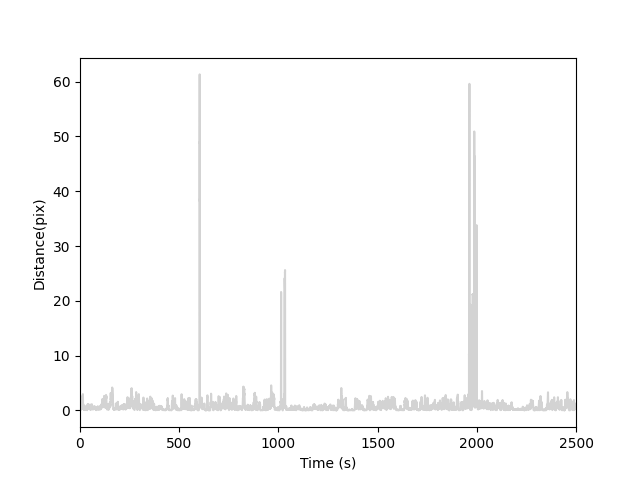

In [574]:
#Plotting Distance Over Time
fig, ax = plt.subplots()

ax.plot(tracking_df["time"],tracking_df["distance"],c = 'lightgray')


# x_av = movingaverage(tracking_df["distance"], 25)
# ax.plot(tracking_df["time"],x_av, c = 'b')

ax.set(xlabel = 'Time (s)', ylabel = 'Distance(pix)')

ax.set_xlim(0, 2500)

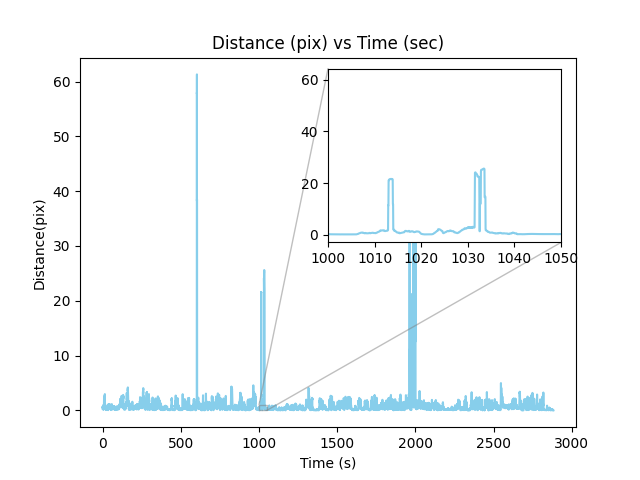

In [575]:
ig, ax = plt.subplots()

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

ax.plot(tracking_df["time"],tracking_df["distance"],c = 'skyblue')
#ax.xlabel('time (s)')
#ax.ylabel('velocity (pix/s)')
ax.set(xlabel = 'Time (s)', ylabel = 'Distance(pix)')
ax.set_title('Distance (pix) vs Time (sec)')
#plt.xlim(left=500,right=510)
# ax.set_ylim(0,50)
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])

x1, x2, y1, y2 = 1000, 1050, 0, 50

axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
#axins.set_xticklabels('')
#axins.set_yticklabels('')
ax.indicate_inset_zoom(axins)
axins.plot(tracking_df["time"],tracking_df["distance"],c = 'skyblue')
plt.show()

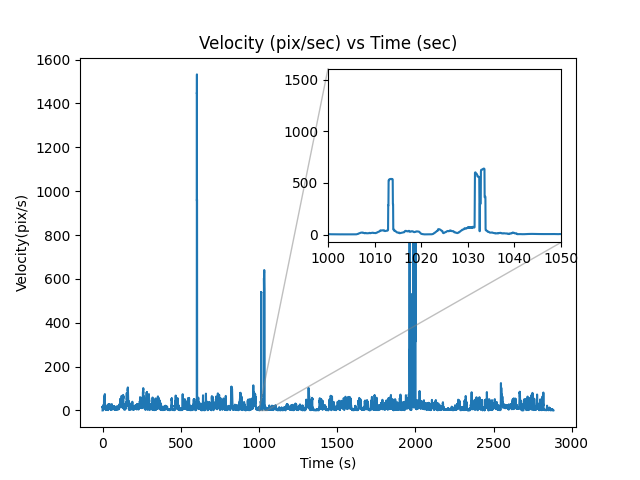

In [576]:
%matplotlib widget
fig, ax = plt.subplots()

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

ax.plot(tracking_df["time"],tracking_df["velocity"])
#ax.xlabel('time (s)')
#ax.ylabel('velocity (pix/s)')
ax.set(xlabel = 'Time (s)', ylabel = 'Velocity(pix/s)')
ax.set_title('Velocity (pix/sec) vs Time (sec)')
#plt.xlim(left=500,right=510)
# ax.set_ylim(0,1000)
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])

x1, x2, y1, y2 = 1000, 1050, 0, 500

axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
#axins.set_xticklabels('')
#axins.set_yticklabels('')
ax.indicate_inset_zoom(axins)
axins.plot(tracking_df["time"],tracking_df["velocity"])
plt.show()
rcParamskeys = plt.rcParams.keys()

In [577]:
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((tracking_df['x'].values, tracking_df['y'].values, tracking_df['velocity'].values))

#two points defining each roi: topleft(X,Y) and topright(X,Y).
rois = {'left_port': position((595, 410), (475, 375)),'right_port': position((40, 425), (160, 390))} 

print(rois)

{'left_port': position(topleft=(595, 410), bottomright=(475, 375)), 'right_port': position(topleft=(40, 425), bottomright=(160, 390))}


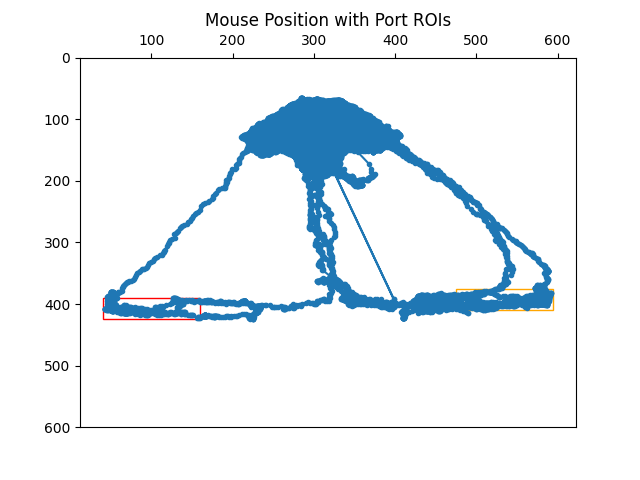

In [578]:
#Plotting Top Left and Top Right Reward Ports as ROIs
import matplotlib.patches as patches


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig,ax = plt.subplots(1)

#plot snout + bounding boxes for rois
plt.plot(filt_bp_x.values,filt_bp_y.values,'.-')

rect1 = patches.Rectangle(rois['right_port'].topleft,rois['right_port'].bottomright[0]-rois['right_port'].topleft[0],rois['right_port'].bottomright[1]-rois['right_port'].topleft[1],linewidth=1,edgecolor='red',facecolor='none')
ax.add_patch(rect1)
rect2 = patches.Rectangle(rois['left_port'].topleft,rois['left_port'].bottomright[0]-rois['left_port'].topleft[0],rois['left_port'].bottomright[1]-rois['left_port'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect2)
plt.ylim(600,0)
plt.title('Mouse Position with Port ROIs')
plt.show()

In [579]:
#Time in ROIs
res = get_timeinrois_stats(bp_tracking.T, rois, fps=fps,check_inroi=True,returndf=True)
res
output_timeinROIS_file = 'EU010_Day9_Time_in_ROIs.csv'
res.to_csv(output_timeinROIS_file)

In [ ]:
#Total distance traveled
np.sum(tracking_df['distance'])

In [ ]:
#Final Dataframe
tracking_df

In [ ]:
#Skeleton Dataframe
skeleton_df = pd.read_csv(skeleton_file, header = [0,1],index_col=0)
skeleton_df

In [ ]:
#Skeleton Analysis
skel_frames = skeleton_df.index.tolist()
skel_df = pd.DataFrame({'frame':skel_frames,
                       'back_angle':skeleton_df['midhead_back']['orientation']})

#Create a column that converts frames into seconds
skel_df["time"] = skel_df['frame']/fps

skel_df["angle_rad_unwrapped"] = np.unwrap(np.deg2rad(skel_df['back_angle']))

skel_df

In [ ]:
#Function for Derivative of Angle
def diff(data,col,window,filt=True):
    #Input should be a DataFrame with columns named 'x' and 'y' containing x,y coordinates for one bodypart 
    slope = []
    slope.append(0)
    for i in range(1,len(data)):
        x1 = data.iloc[i-1][col]
        x2 = data.iloc[i][col]
        slope.append((x2 - x1)*fps)
    if filt:
        slope = movingaverage(slope,window_size = window)
    data[col + '_' + 'derivative'] = slope
    return(data)

In [ ]:
#Derivative of Angle for Skeleton
diff(skel_df,'angle_rad_unwrapped',25,filt=True)

In [ ]:
%matplotlib widget

plt.plot(skel_df['time'],skel_df['angle_rad_unwrapped'])
plt.xlabel('Time(sec)')
plt.ylabel('MidHead - Back Orientation (rad)')
plt.title('MidHead- Back "Cumulative" Angle Throughout Experiment')

In [ ]:
fig, axs = plt.subplots(2,1)

fig.suptitle('Derivative of Angular Orientation Reveals Turning Behaviors')

# axs[0].plot(skel_df['time'],skel_df['back_angle'],c='darkgray')
axs[0].plot(skel_df['time'],skel_df['angle_rad_unwrapped'])
axs[1].plot(skel_df['time'],skel_df['angle_rad_unwrapped_derivative'],c='purple')

axs[0].set(ylabel='Orientation (rad)')
axs[1].set(xlabel='Time (s)',ylabel='ΔOrientation / ΔTime (rad/sec)')

# axs[0].set_ylim(20,30)
axs[1].set_ylim(-5,5)
           
axs[0].set_xlim(350,370)
axs[1].set_xlim(350,370)

In [ ]:
#Turning Behavior Over Experiment Duration
results = pd.DataFrame({'frame':tracking_df['frame'],
                        'time':tracking_df['time'],
                        'x':tracking_df['x'],
                        'y':tracking_df['y'],
                        'distance':tracking_df['distance'],
                        'velocity':tracking_df['velocity'],
                        'turning':skel_df['angle_rad_unwrapped_derivative']})
results = results.set_index('frame')
results

#Save to csv
output_turning_file = 'EU011_Day12_DLC_Turning_Behavior.csv'
results.to_csv(output_turning_file)


In [ ]:
#Alternative Angle Calculation
def delta(data,window,filt=False):
    #Input should be a DataFrame with columns named 'x' and 'y' containing x,y coordinates for one bodypart 
    delta_x = []
    delta_y = []
    for i in range(len(data)):
        x1 = data.iloc[i]['back_x']
        x2 = data.iloc[i]['midhead_x']
        y1 = data.iloc[i]['back_y']
        y2 = data.iloc[i]['midhead_y']
        delta_x.append(x2 - x1)
        delta_y.append(y2 - y1)
    if filt:
        dists = movingaverage(dists,window_size = window)
    data['delta_x'] = delta_x
    data['delta_y'] = delta_y
    return(data)

angle_df = pd.DataFrame({'frame':frames,
                         'time':tracking_df['time'],
                        'midhead_x':bp_df[network]['midhead']["x"],
                        'midhead_y':bp_df[network]['midhead']["y"],
                        'back_x':bp_x,
                        'back_y':bp_y})

delta(angle_df,25)

In [ ]:
#Function for Calculating Angle
def calc_angle(data):
    xDiff = data['delta_x']
    yDiff = data['delta_y']
    angle = []
    for i in range(len(data)):
        xDiff = data['delta_x'][i]
        yDiff = data['delta_y'][i]
        ang = degrees(atan2(yDiff, xDiff))
        if ang < 0:
            ang += 360
        angle.append(ang)
    # if not 0 <= ang <+ 360: raise ValueError('Ang was not computed correctly')
    data['angle'] = angle
    return data

calc_angle(angle_df)

In [ ]:
angle_df['angle_rad_unwrapped'] = np.unwrap(np.deg2rad(angle_df['angle']))
diff(angle_df,'angle_rad_unwrapped',25,filt=True)

output_angle_file = 'KB038_Day9_DLC_AlternativeTurning_Behavior.csv'
angle_df.to_csv(output_angle_file)

In [ ]:
#Extracting Turning Behavior
fig, axs = plt.subplots(2,1)

fig.suptitle('Extracting Turning Behaviors')

axs[0].plot(angle_df['time'],angle_df['angle_rad_unwrapped'])
axs[1].plot(angle_df['time'],angle_df['angle_rad_unwrapped_derivative'],c='purple')

axs[0].set(ylabel='Orientation (rad)')
axs[1].set(xlabel='Time (s)',ylabel='ΔOrientation/ΔTime (rad/sec)')

# axs[0].set_ylim(0,360)
axs[1].set_ylim(-4,4)
           
axs[0].set_xlim(0,2882)
axs[1].set_xlim(0,2882)

In [373]:
#%reset